<a href="https://colab.research.google.com/github/harshaga998/Creating-Customer-Segments/blob/master/Recommendation_Engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"harsh998","key":"7308348a594267440d62382be68ad071"}'}

In [0]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d ashishvaya/recommendation-engine

  0% 0.00/1.87M [00:00<?, ?B/s]
100% 1.87M/1.87M [00:00<00:00, 60.7MB/s]


In [0]:
ls

kaggle.json  recommendation-engine.zip  sample_data/


In [0]:
!unzip recommendation-engine.zip

Archive:  recommendation-engine.zip
  inflating: test_submissions_NeDLEvX.csv  
  inflating: problem_data.csv        
  inflating: train_submissions.csv   
  inflating: user_data.csv           
  inflating: sample_submissions_wbscxqU.csv  
  inflating: submission.csv          


In [0]:
ls

kaggle.json                     submission.csv
problem_data.csv                test_submissions_NeDLEvX.csv
recommendation-engine.zip       train_submissions.csv
sample_data/                    user_data.csv
sample_submissions_wbscxqU.csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [0]:
problems_df = pd.read_csv('problem_data.csv')
users_df = pd.read_csv('user_data.csv')
train_df = pd.read_csv('train_submissions.csv')
test_df = pd.read_csv('test_submissions_NeDLEvX.csv')


In [0]:
print("Training data count: ",len(train_df))
print("No. of null values: ", train_df.isnull().sum())

Training data count:  155295
No. of null values:  user_id           0
problem_id        0
attempts_range    0
dtype: int64


In [0]:
print("Testing data count: ",len(test_df))
print("No. of null values: ", test_df.isnull().sum())

Testing data count:  66555
No. of null values:  ID            0
user_id       0
problem_id    0
dtype: int64


In [0]:
print("No. of problems: ",len(problems_df))
print("No. of null values: ",problems_df.isnull().sum())

No. of problems:  6544
No. of null values:  problem_id       0
level_type     133
points        3917
tags          3484
dtype: int64


In [0]:
print("No. of users: ",len(users_df))
print("No. of null values: ",users_df.isnull().sum())

No. of users:  3571
No. of null values:  user_id                         0
submission_count                0
problem_solved                  0
contribution                    0
country                      1153
follower_count                  0
last_online_time_seconds        0
max_rating                      0
rating                          0
rank                            0
registration_time_seconds       0
dtype: int64


In [0]:
print("PROBLEMS_DATA.CSV\n",problems_df.head(),"\n")
print("USERS_DATA.CSV\n",users_df.head(),"\n")
print("TRAIN_SUBMISSIONS.CSV\n",train_df.head(),"\n")
print("TEST_SUBMISSIONS_NEDLEVX.CSV\n",test_df.head(),"\n")

PROBLEMS_DATA.CSV
   problem_id level_type  points                                 tags
0  prob_3649          H     NaN                                  NaN
1  prob_6191          A     NaN                                  NaN
2  prob_2020          F     NaN                                  NaN
3   prob_313          A   500.0                greedy,implementation
4   prob_101          A   500.0  constructive algorithms,greedy,math 

USERS_DATA.CSV
      user_id  submission_count  problem_solved  contribution  country  \
0  user_3311                47              40             0      NaN   
1  user_3028                63              52             0    India   
2  user_2268               226             203            -8    Egypt   
3   user_480               611             490             1  Ukraine   
4   user_650               504             479            12   Russia   

   follower_count  last_online_time_seconds  max_rating   rating  \
0               4                150411164

#Merging the data

In [0]:
df = pd.merge(train_df,problems_df,on='problem_id', how='left')
X = pd.merge(df,users_df,on='user_id',how= 'left')

In [0]:
#Trianing data
print("Training data: ",len(X))
users = X['user_id'].unique()
print("Users: ",len(users))
problems = X['problem_id'].unique()
print("Problems: ",len(problems))

#Testing data
print("\nTesting data: ",len(X))
users = test_df['user_id'].unique()
print("Users: ",len(users))
problems = test_df['problem_id'].unique()
print("Problems: ",len(problems))


Training data:  155295
Users:  3529
Problems:  5776

Testing data:  155295
Users:  3501
Problems:  4716


In [0]:
X.head()

user_id problem_id  attempts_range level_type  points  \
0   user_232  prob_6507               1          B  1000.0   
1  user_3568  prob_2994               3          C  1500.0   
2  user_1600  prob_5071               1          A   500.0   
3  user_2256   prob_703               1          A   500.0   
4  user_2321   prob_356               1          D  2000.0   

                         tags  submission_count  problem_solved  contribution  \
0                     strings                53              47             0   
1              brute force,dp               133             118             0   
2              implementation                50              44             0   
3  brute force,implementation               271             233            23   
4       dfs and similar,trees               155             135             0   

      country  follower_count  last_online_time_seconds  max_rating   rating  \
0  Bangladesh               1                1503633778     307.913  206.709   
1         NaN               0                1502200122     324.255  235.378   
2         NaN               7                1504719542     343.177  229.358   
3   Indonesia              40                1505175115     436.927  399.083   
4       India              80                1505421849     492.546  472.190   

           rank  registration_time_seconds  
0      beginner                 1432110935  
1      beginner                 1454664414  
2      beginner                 1473490873  
3  intermediate                 1447736644  
4      advanced                 1437724657

In [0]:
train_df.head()

user_id problem_id  attempts_range
0   user_232  prob_6507               1
1  user_3568  prob_2994               3
2  user_1600  prob_5071               1
3  user_2256   prob_703               1
4  user_2321   prob_356               1

In [0]:
factor = pd.factorize(X['level_type'])
X['diff_level'] = factor[0]

factor = pd.factorize(X['rank'])
X['rank'] = factor[0]
factor = pd.factorize(users_df['rank'])
users_df['rank'] = factor[0]

X['user_id'] = X['user_id'].str.replace('user_','')
X['problem_id'] = X['problem_id'].str.replace('prob_','')

X['user_id'] = X['user_id'].astype('int64',copy = False)
X['problem_id'] = X['problem_id'].astype('int64',copy = False)

X.head()


user_id  problem_id  attempts_range level_type  points  \
0      232        6507               1          B  1000.0   
1     3568        2994               3          C  1500.0   
2     1600        5071               1          A   500.0   
3     2256         703               1          A   500.0   
4     2321         356               1          D  2000.0   

                         tags  submission_count  problem_solved  contribution  \
0                     strings                53              47             0   
1              brute force,dp               133             118             0   
2              implementation                50              44             0   
3  brute force,implementation               271             233            23   
4       dfs and similar,trees               155             135             0   

      country  follower_count  last_online_time_seconds  max_rating   rating  \
0  Bangladesh               1                1503633778     307.913  206.709   
1         NaN               0                1502200122     324.255  235.378   
2         NaN               7                1504719542     343.177  229.358   
3   Indonesia              40                1505175115     436.927  399.083   
4       India              80                1505421849     492.546  472.190   

   rank  registration_time_seconds  diff_level  
0     0                 1432110935           0  
1     0                 1454664414           1  
2     0                 1473490873           2  
3     1                 1447736644           2  
4     2                 1437724657           3

In [0]:
X.describe()

user_id     problem_id  attempts_range         points  \
count  155295.000000  155295.000000   155295.000000  126220.000000   
mean     1778.145774    3236.588486        1.755028     993.302369   
std      1026.136989    1918.921434        1.078450     568.115307   
min         1.000000       1.000000        1.000000      -1.000000   
25%       882.000000    1606.000000        1.000000     500.000000   
50%      1780.000000    3334.000000        1.000000    1000.000000   
75%      2659.000000    5008.000000        2.000000    1500.000000   
max      3571.000000    6544.000000        6.000000    5000.000000   

       submission_count  problem_solved   contribution  follower_count  \
count     155295.000000   155295.000000  155295.000000   155295.000000   
mean         372.235680      336.078695       5.493718       61.064406   
std          398.204943      377.378519      19.076626      258.997551   
min            1.000000        1.000000     -64.000000        0.000000   
25%          118.000000       99.000000       0.000000        7.000000   
50%          237.000000      209.000000       0.000000       20.000000   
75%          480.000000      428.000000       1.000000       52.000000   
max         4570.000000     4476.000000     171.000000    10575.000000   

       last_online_time_seconds     max_rating         rating           rank  \
count              1.552950e+05  155295.000000  155295.000000  155295.000000   
mean               1.503666e+09     407.525560     368.623667       0.920352   
std                3.867762e+06      99.670629     112.046565       0.816435   
min                1.484239e+09     303.899000       0.000000       0.000000   
25%                1.504118e+09     323.394000     288.131000       0.000000   
50%                1.505289e+09     383.028000     356.078000       1.000000   
75%                1.505560e+09     468.463000     445.814000       1.000000   
max                1.505595e+09     983.085000     911.124000       3.000000   

       registration_time_seconds     diff_level  
count               1.552950e+05  155295.000000  
mean                1.427513e+09       1.792537  
std                 5.033908e+07       1.879960  
min                 1.264761e+09      -1.000000  
25%                 1.408458e+09       0.000000  
50%                 1.442762e+09       2.000000  
75%                 1.464692e+09       2.000000  
max                 1.484236e+09      13.000000

In [0]:
# creating y vector

y = pd.get_dummies(X['attempts_range'])

y_xgb = X['attempts_range']

X = X.drop(['points','attempts_range','follower_count','last_online_time_seconds','tags','level_type','country','registration_time_seconds'],axis = 1)
X.head()

user_id  problem_id  submission_count  problem_solved  contribution  \
0      232        6507                53              47             0   
1     3568        2994               133             118             0   
2     1600        5071                50              44             0   
3     2256         703               271             233            23   
4     2321         356               155             135             0   

   max_rating   rating  rank  diff_level  
0     307.913  206.709     0           0  
1     324.255  235.378     0           1  
2     343.177  229.358     0           2  
3     436.927  399.083     1           2  
4     492.546  472.190     2           3

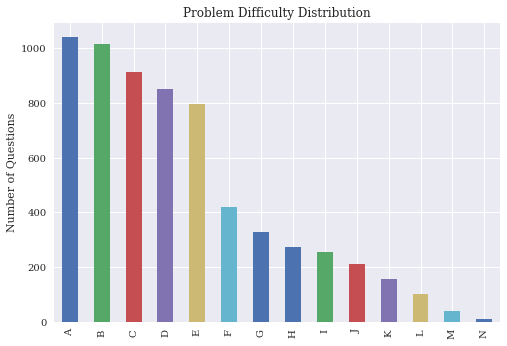

In [0]:
fig = problems_df['level_type'].value_counts().sort_index().plot(kind ='bar', stacked = True, title = "Problem Difficulty Distribution")
fig.set_ylabel('Number of Questions')
plot.show()

####We see that there are more problems which are in the first half of the problem difficulty than the  second half.

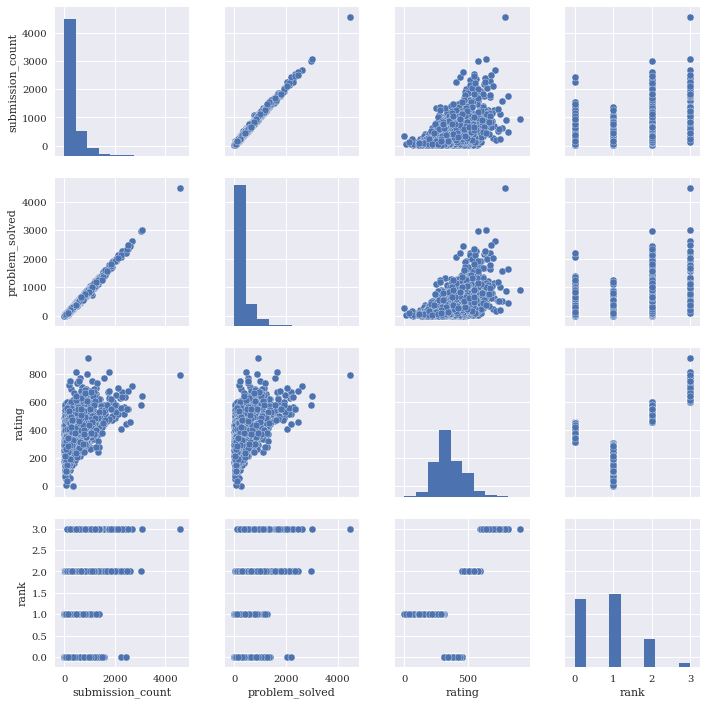

In [0]:
ax = sns.pairplot(users_df[["submission_count","problem_solved","rating","rank"]])

####So what do the above pair plots tell us?

**1. **Higher number of submissions were made by fewer number of users. 

**2.** Higher count of problems were solved by fewer number of users.

**3.** The rating of users is uniformly spread, and most are with a rating somewhere in the middle.

**4.** Majority users are at an intermediate and beginner level, with very few experts.

**5.** Rating is not directly proportional to the number of problems solved or submissions - this means that difficulty level should have played a part.

In [0]:
var_Corr = X[["submission_count", "problem_solved", "rating", "rank"]].corr()
fig2 = plot.figure()
fig2 = sns.heatmap(var_Corr, xticklabels=var_Corr.columns, yticklabels=var_Corr.columns,mask = False, annot= True)
plot.show()

ValueError: ignored

<Figure size 576x396 with 0 Axes>